# **아파치 스파크(Apache Spark)란?**

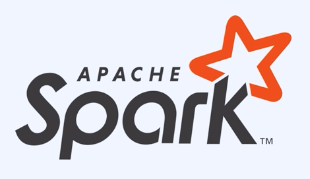

빅데이터 처리를 위한 오픈 소스 고속 분산 처리 엔진이다.

우리가 아는 회사라면 대부분이 다 사용하고 있다.

아마존, 마이크로소프트, 넷플릭스,에어비엔비, 어도비, 나사 등
그렇다면, 위 회사들이 느끼는 공통적인 문제가 있다는 뜻이다.

그 문제는 바로 빅데이터 문제이다.

규모: 데이터의 크기가 증가한다.

속도: 데이터가 생성되는 속도가 증가한다.

다양성: 데이터의 종류가 증가한다.

빅데이터 문제를 가장 먼저 겪은 구글에서 ‘The Google File System’이라는 논문을 발표한다.

이 논문에 영감을 받은 야후는 하둡(Hadoop)이라는 프로젝트를 발표하게 되었다.

**하둡(Hadoop)이란?**

하나의 에코 시스템을 이루고, 크게 세가지의 파트를 가졌다.

HDFS: 파일 시스템

Map Reduce: 연산 엔진

Yarn: 리소스 관리 클러스터 매니저

아파치 스파크는 연산 엔진을 대체하는 프로젝트이다.

**스파크의 특별한 점**

빠르다.

**메모리 계층 구조** 
메모리에서 CPU까지의 계층 구조를 아래와 같이 나타낼 수 있다.

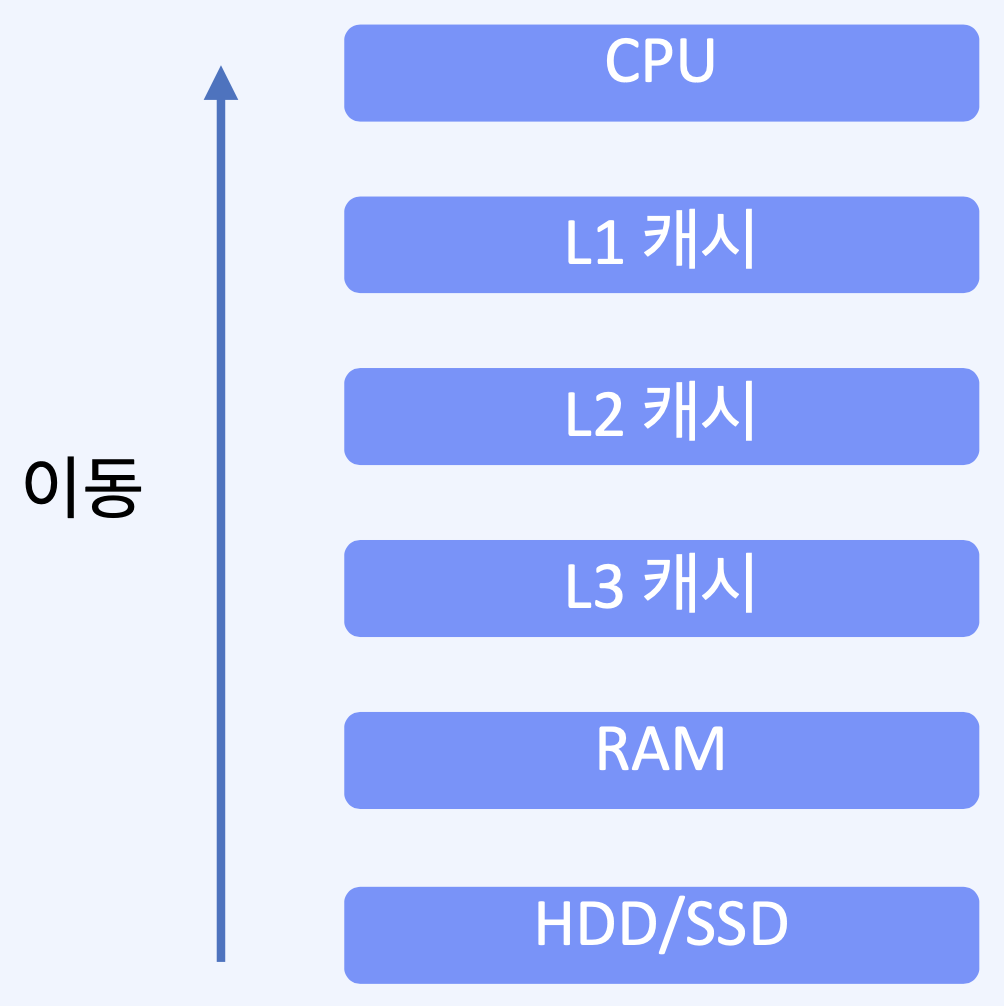

컴퓨터가 연산을 시작하면 하드디스크에서 CPU까지 위로 이동을 하게 된다.

연산에 자주 쓰이는 데이터는 CPU가 데이터를 더 빨리 접근하기 위해서 위로 향하게 되고, 연산에 자주 쓰이지 않는 데이터는 아래로 향하게 된다.


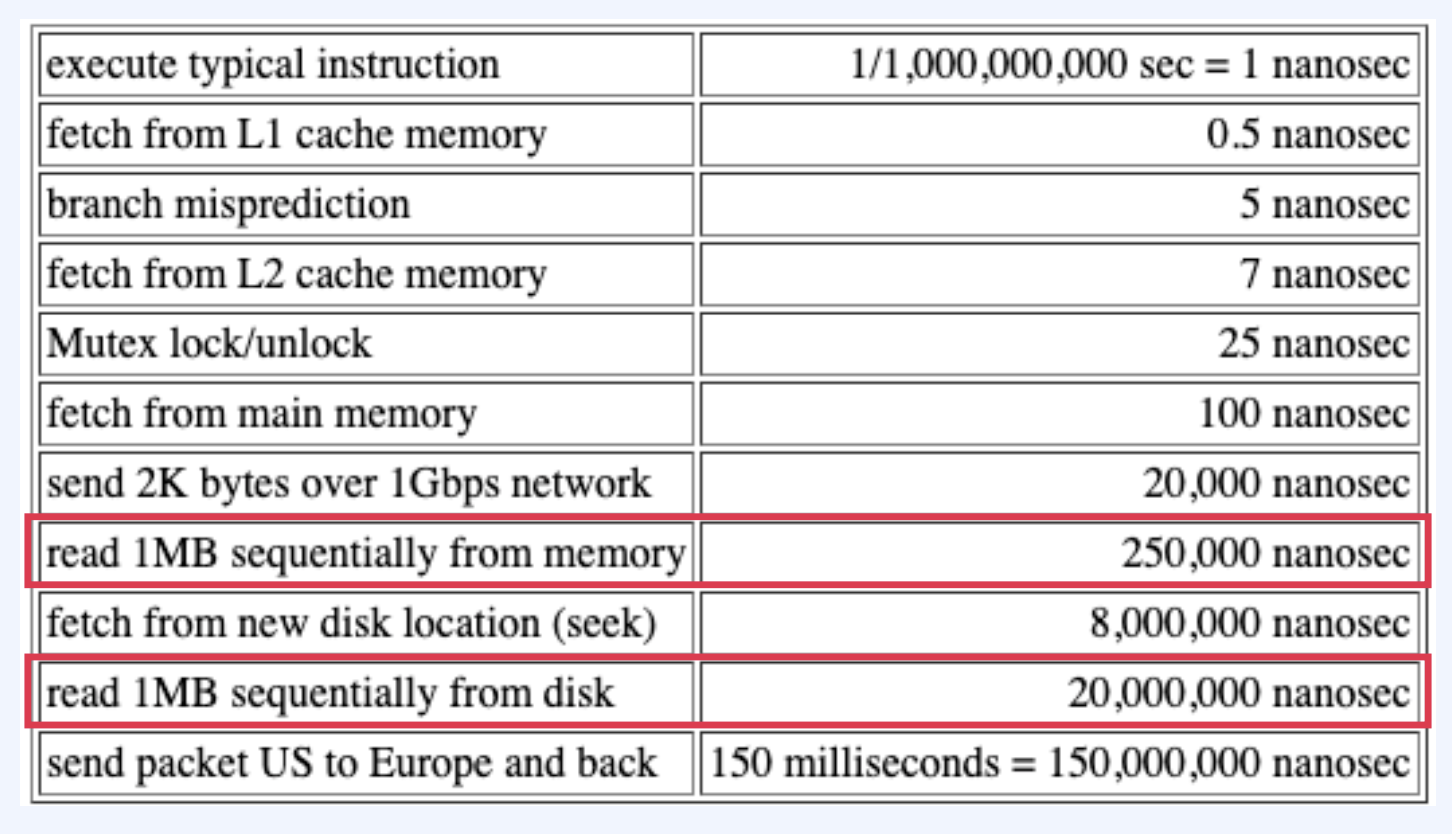

위 이미지는 계층 간 속도 차이를 알 수 있는 테이블이다.

똑같은 일을 하는데 한 칸 씩 내려갈 때마다 
속도의 차이가 굉장히 크게 난다고 볼 수 있다.

일반적인 컴퓨터 램의 용량은 8GB ~ 16GB 정도이다.

이 때 100 메가 바이트의 데이터 처리는 문제가 없겠지만, 만약 100 페타 바이트 데이터 디스크를 사용하여 처리를 하게 되면 굉장히 느릴 것이다.

그리하여 나온 아이디어가 데이터를 쪼개어 처리하자는 것이다.

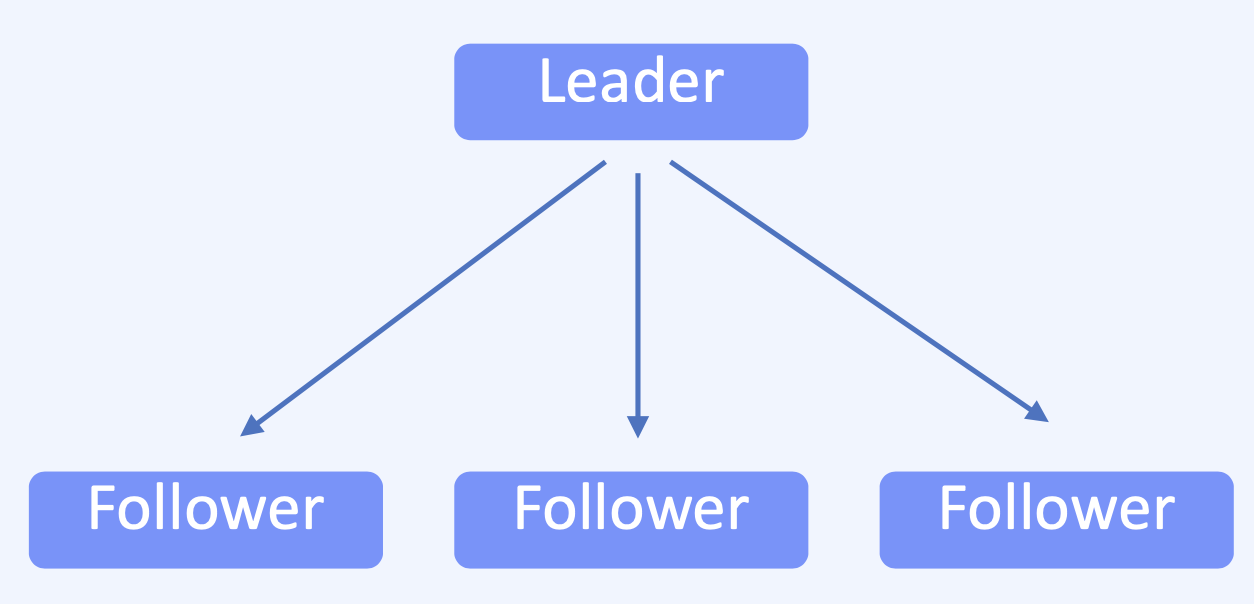

쪼갠 데이터를 여러 노드의 메모리에서 동시에 처리하자는 것이다.
그렇기 때문에 여러 컴퓨터를 사용하면서 인메모리(In-Memory) 연산이 가능하게 된다.

**인메모리(In-Memory) 연산**

스파크가 빠르다는 것은 빅데이터의 인메모리 연산이 가능하다는 것을 뜻한다.

# **스파크 클러스터**

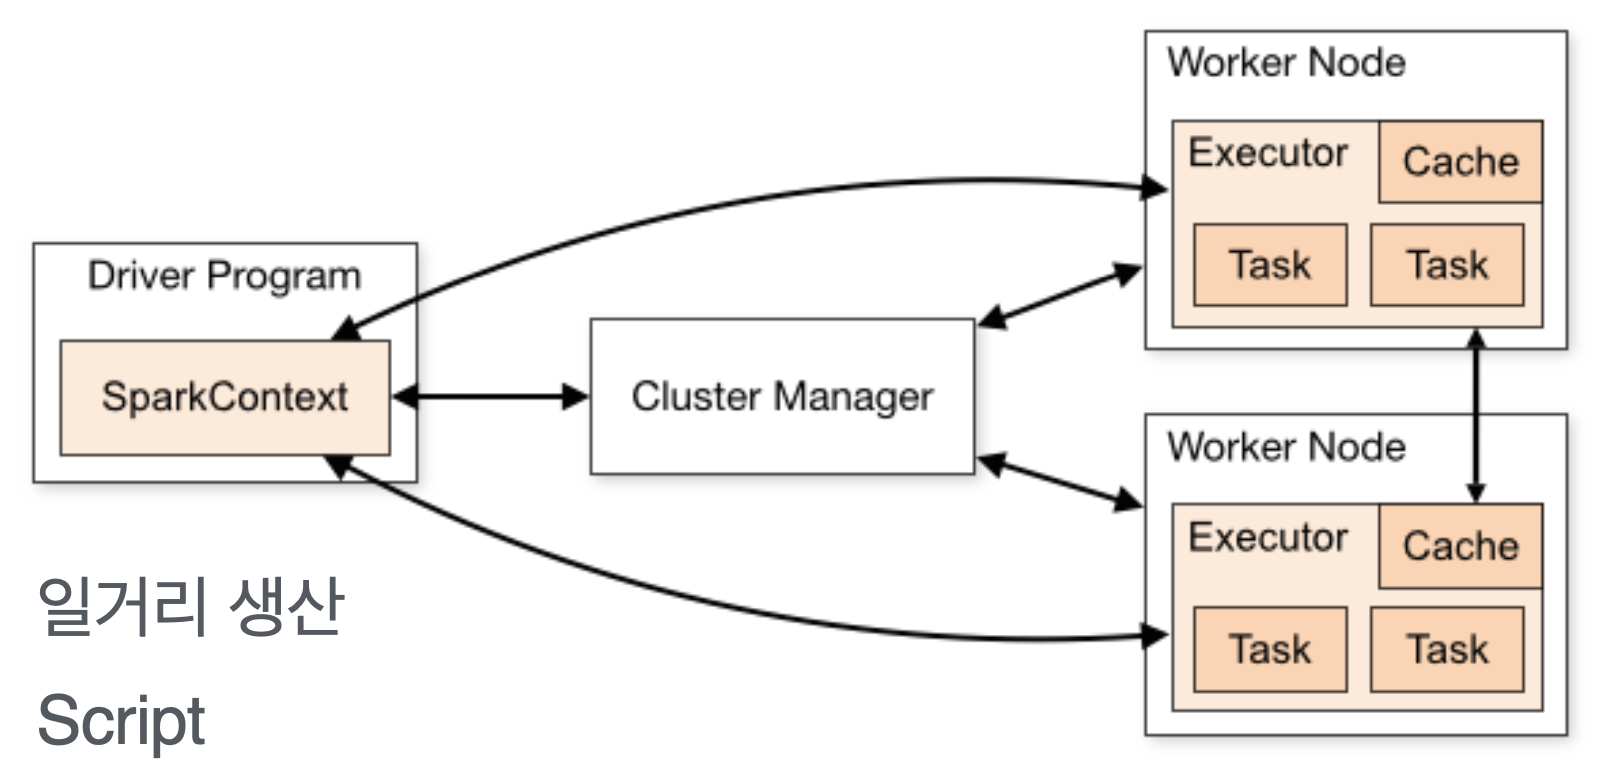

스파크는 하나의 클러스터를 이루게 되는데 스파크 컨텍스트가 있는 드라이버 프로그램, 클러스터 매니저, 워커 노드 세 가지로 나눌 수있다.

드라이버 프로그램는 사용하게 될 컴퓨터이다.

파이썬, 자바, 스칼라 등으로 테스크를 만들고 정의한다.

정의 된 테스크는 클러스터 매니저로 넘어가서 일거리가 분배된다.

이 때 여러가지 클러스터 매니저를 사용할 수 있다.

하둡이라면 Yarn, AWS라면 Elastic MapReduce를 쓸 수 있다.

마지막으로 연산을 하는 노드는 1 CPU 코어 당 1 노드(Node)가 배치되어, 인메모리 연산을 담당하고 있다.

하지만 컴퓨터로 스파크 프로그램을 돌리면 판다스 보다 느리다는 것을 느끼게 되는데, 그 이유는 스파크가 확장성을 고려하여 설계되었기 때문이다.

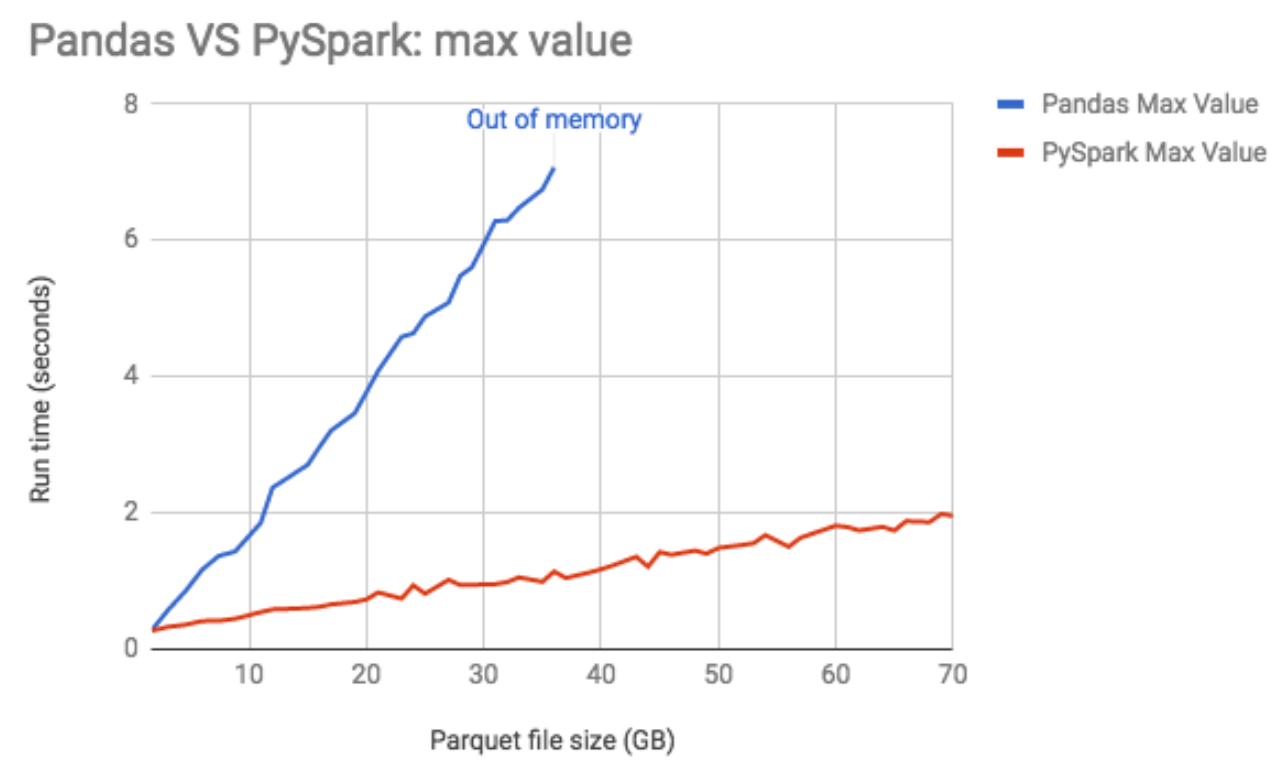

위 이미지는 1개의 노드에서 판다스와 스파크의 성능을 비교한 테이블이다.

배열에서 최고값을 찾는 단순 연산을 시켜보면, 판다스는 속도를 유지하며 쭉 올라가다가 일정 파일 크기에서 Out of memory가 발생한 걸 알 수 있다.

하지만 스파크는 아무리 파일 크기가 커지더라도 속도를 유지하며 계속 연산을 할 수 있는 것을 확인할 수 있다.

이는 스파크가 수평적 확장이 가능함을 나타내며 노드는 필요에 따라 계속 늘릴 수 있다.

# **판다스 vs 스파크**

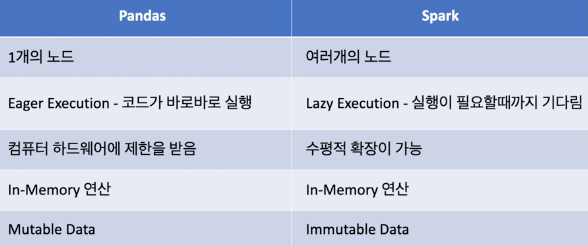

**그래도 스파크는 빠르다.**

하둡 MapReduce보다 메모리상에서 100배, 디스크 상에서 10배정도 빠르다.

게으른 연산(Lazy Evaluation): 테스크를 정의할 때는 연산을 하지 않다가 결과가 필요할 때 연산하기 때문에 기다리면서 연산 과정을 최적화 할 수 있다.

**RDD(Resilient Distributed Dataset)**

RDD는 스파크의 핵심 데이터 모델이다.(RDD만 알아도 스파크의 90%를 이해하는 것일 만큼 코어 컨셉이다.)

여러 분산 노드에 걸쳐서 저장되고, 변경이 불가능하며 여러개의 파티션으로 분리된다는 장점이 있다.

**스파크의 진화**
1에서 3까지의 버전 동안 어떤 기능이 추가 되었고, 트렌드가 어떻게 변하고 있는지 알아볼 것이다.

**Spark 1.0**
2014년에 정식 발표되어 RDD를 이용한 인메모리 처리 방식을 고안했다.

데이터프레임이라는 자료구조가 버전 1.3에 추가 되었고, Project Tungsten 덕분에 엔진 업그레이드로 메모리와 CPU 효율을 최적화 할 수 있게 되었다.

**Spark 2.0**
2016년에 발표되어 단순화되고 성능이 개선되었다.

SparkSQL 위에 올린 Structured Streaming 이라는 프로젝트로 인해 스트리밍 프로세싱이 어느정도 가능하게 되었다.

데이터셋이라는 데이터프레임의 확장형 자료구조가 등장하였다.

Catalyst Optimizer 프로젝트로 인해서 언어에 상관없이 동일한 성능을 보장할 수 있게 되어 파이썬을 비롯해 스칼라, 자바, R이 사용 가능하게 되었다.

**Spark 3.0**

2020년에 발표되어 MLlib과 SparkSQL의 기능이 추가되었다.

스파크 2.4보다 약 두 배 가량 빨라졌다.

이는 Adaptive execution과 Dynamic partition pruning과 같은 최적화 프로젝트 덕분이었다.

파이스파크의 사용성 개선도 눈에 띄었다.

딥러닝 지원이 강화되었는데, GPU 노드가 지원 되어 머신러닝 프레임 워크와 연계가 가능해졌다.

분산 그래프 연산을 가능하게 해주는 GraphX라는 프로젝트도 추가되었다.

추천이나 피드를 띄우는 프로젝트를 하는 데에 유용하다.

파이썬 2의 지원이 끊기고, 쿠버네티스의 지원이 강화되었다.

# **스파크 구성**
현재 5가지(Spark Core, Spark SQL, Spark Streaming, MLlib, GraphX)로 이루어져 있는데, 새 기능이 추가되고 성능이 좋아지고 있을 뿐 근본은 바뀌지 않는다.